In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
df=pd.read_csv(r"F:\Jupyter\data_jobs.csv")
df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [16]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [17]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

In [18]:
df_DA_exploded = df_DA.explode('job_skills')

In [19]:
df_DA_pivot=df_DA_exploded.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)

df_DA_pivot.loc['Total']=df_DA_pivot.sum()

In [20]:
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [21]:
df_DA_pivot=df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot=df_DA_pivot.drop('Total',axis=0)
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


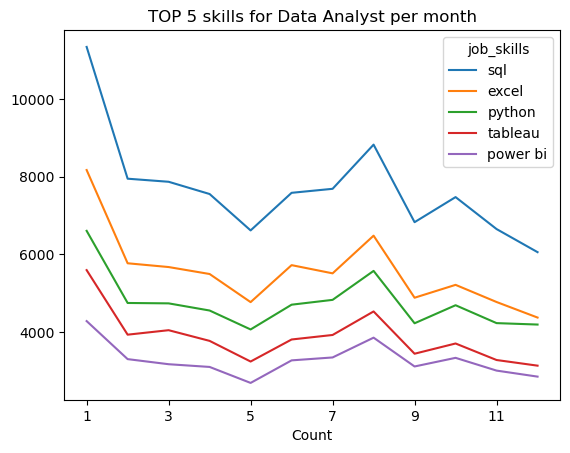

In [22]:
df_DA_pivot.iloc[:,:5].plot(kind='line')
plt.title('TOP 5 skills for Data Analyst per month')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

In [23]:
df_DA_pivot=df_DA_pivot.reset_index()

In [24]:
df_DA_pivot

job_skills,job_posted_month_no,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
0,1,11336,8170,6606,5596,4285,3607,3830,1880,1778,...,2,0,0,1,0,0,0,1,0,0
1,2,7947,5772,4751,3936,3307,2576,2634,1291,1235,...,0,0,0,0,0,0,0,0,0,0
2,3,7868,5675,4741,4051,3176,2650,2554,1266,1203,...,0,1,0,0,0,0,1,0,0,0
3,4,7553,5496,4557,3776,3106,2399,2598,1190,1177,...,0,0,0,0,1,0,0,0,0,0
4,5,6617,4773,4070,3245,2695,2093,1940,979,957,...,0,0,0,0,0,0,0,0,0,1
5,6,7584,5724,4707,3812,3275,2442,2174,1173,1237,...,0,0,0,0,0,0,0,0,0,0
6,7,7687,5513,4831,3928,3350,2444,2118,1096,1069,...,0,0,1,0,0,0,0,0,0,0
7,8,8823,6482,5576,4533,3859,2975,2560,1332,1298,...,0,0,0,0,0,0,0,0,0,0
8,9,6829,4886,4229,3446,3118,2146,1880,944,945,...,0,0,0,0,0,0,0,0,0,0
9,10,7474,5217,4693,3709,3340,2380,2114,955,990,...,0,1,0,0,0,0,0,0,0,0


In [25]:
df_DA_pivot['job_posted_month']=df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%B'))

In [34]:
df_DA_pivot.set_index('job_posted_month',inplace=True)

In [37]:
df_DA_pivot=df_DA_pivot.drop(columns='job_posted_month_no',inplace=True)
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
February,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
March,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
April,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
June,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
July,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
August,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
September,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


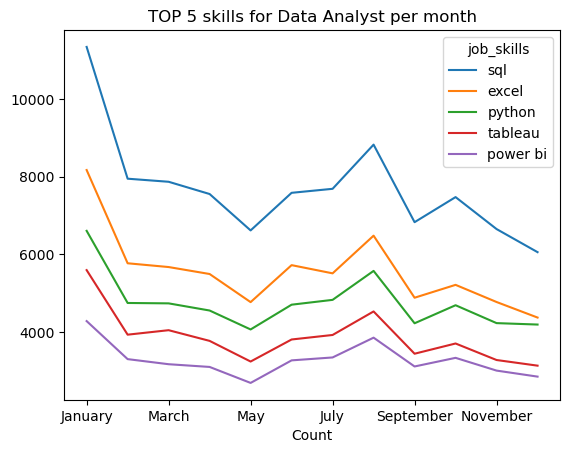

In [38]:
df_DA_pivot.iloc[:,:5].plot(kind='line')
plt.title('TOP 5 skills for Data Analyst per month')
plt.xlabel('Count')
plt.ylabel('')
plt.show()